Recursion is a technique by which a function makes one or more calls to itself during execution, or by which a data structure relies upon smaller instances of the very same type of structure in its representation. Deals with repeated tasks and is a powerful and elegant alternative to looping, such as the “for” loop.

### Linear Recursion

Function that only makes a single call to itself each time the function runs. _**Binary recursion**_ is the scenario where calls are made twice each time the function runs. 

Examples are below:

- Factorial function: Recursively multiply the numbers in decreasing matter till it reaches `1`.
- Binary search algorithm

#### Factorial function

This is linear because the number of primitive operations grows linearly with $n$ (thus $O(n)$).

In [20]:
def factorial_function(n):
    if n == 1:
        return n
    return n * factorial_function(n - 1)

factorial_function(10)

3628800

#### Binary search algorithm

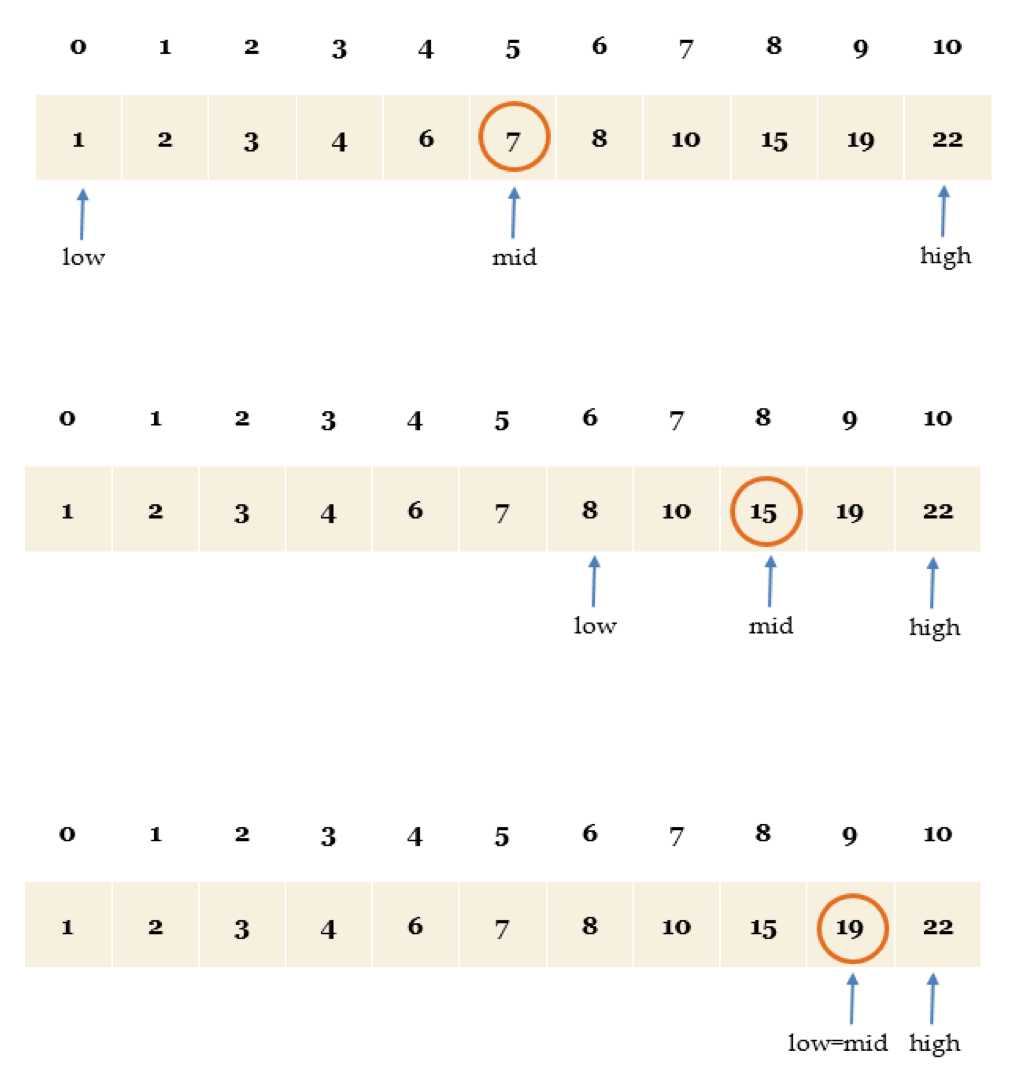

_(Note that the elements have to be sorted first)_

Searches for the specified value in the array:

In [19]:
def binary_search(data, target, low=None, high=None):
    low = 0 if low is None else low
    high = len(data) - 1 if high is None else high 

    # Low and high 
    if low > high:
        return False
    else:
        mid = (low + high) // 2
        
        if target == data[mid]:
            return True

        elif target < data[mid]:
            return binary_search(data, target, low, mid - 1)
        
        else:
            return binary_search(data, target, mid + 1, high)

binary_search(sorted([3,6,19,4,15,1,7,8,2,10,22]), 10)

True

The **analysis** of a binary search algorithm is as follows,

1. Range of each recurseive binary search is computed as $\text{high} - \text{low} + 1$ (where $\text{high}$ and $\text{low}$ is index.
2. $\text{mid}$ is defined as $\frac{\text{low} + \text{high}}{2}$
3. If value at $\text{mid}$ equals the target value, return true.
4. If no match at `3.`, current list is split from $\text{mid}$ into two sub-lists. Call same binary search algorithm for each sub-list. The number of remaining elements in each sub-list is reduced at least by half.

    - $(\text{mid} - 1) - \text{low} + 1 = \frac{\text{low} + \text{high}}{2} - \text{low} \leq \frac{\text{high} - \text{low} + 1}{2}$
    - $\text{high} - (\text{mid} + 1) + 1 = \frac{\text{low} + \text{high}}{2} - \text{low} \leq \frac{\text{high} - \text{low} + 1}{2}$

Hence after the first recursive call, the remaining elements becomes at most $\frac{n}{2}$. 

After the second recursive call, it becomes at most $\frac{n}{4}$, which leads to the $k$th call with at most $\frac{n}{2k}$. 

Finally, the recursive call is repeated until the value at the $\text{mid}$ is equal to the target value or the current list becomes empty.

Thus giving the maximum number of recursive calls $r$ computed as $\frac{n}{2^r} < 1$ (where $r$ is the smallest integer that satisfies the inequality).

- $\text{log}(\frac{n}{2^r}) < \text{log}(1)$

- $\text{log}(n) - \text{log}(2^r) < 0$

- $\text{log}(n - r) < 0$

- $r > \text{log}(n)$

This fulfills the inequality $r = \lfloor \text{log}(n) \rfloor + 1$. Thus the time complexity is $O(\text{log}(n))$.

#### Things to note

- Max call stack size (stack overflow error)
- Tail Call Optimization
- Memorization

#### Designing recursive algorithms

1. Test for base cases: Should have at least one base case that should not use recursion.
2. Recursive call: Should have at least one recursive call and be designed in a way such that each recursive call makes some progress towards the base case, and all possible chains of recursive calls eventually reach a base case.

#### Fundamental technique to solve problem:

1. Identifying the base case
2. Identifying the recursion formula/equation to transform the problem to smaller version
    - Problem requires back-tracking
    - Problem has tree structure

Here's a case without recusrion:

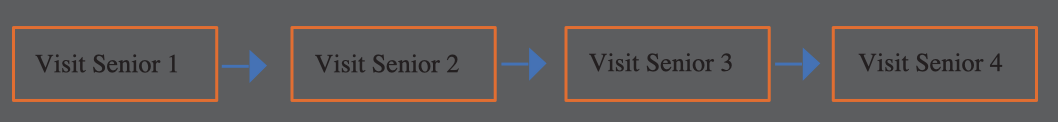

In [17]:
seniors = ["Senior 1", "Senior 2", "Senior 3", "Senior 4"] 

def visit_seniors(seniors):
    for senior in seniors:
        print("Visit", senior)

visit_seniors(seniors)

Visit Senior 1
Visit Senior 2
Visit Senior 3
Visit Senior 4


Here's a case with recursion:

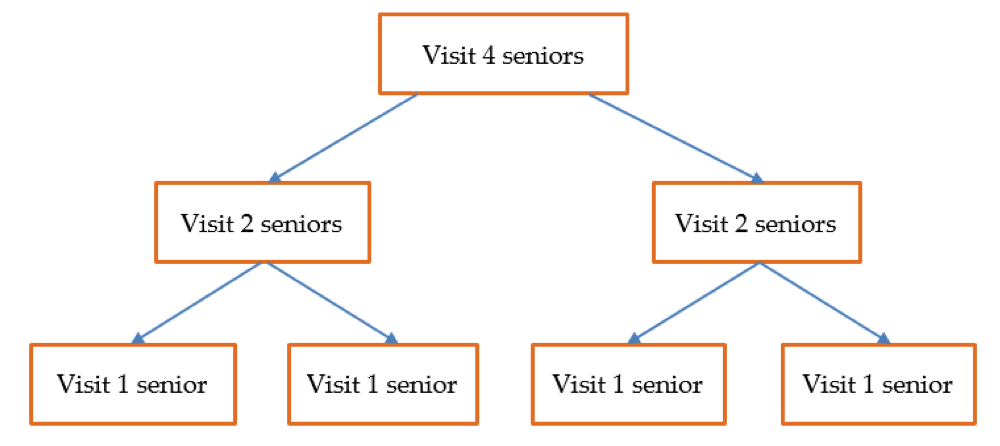

In [18]:
seniors = ["Senior 1", "Senior 2", "Senior 3", "Senior 4"] 

def visit_seniors(seniors):
    if len(seniors) == 1:
        senior = seniors[0]
        print("Visit", senior)
        
    else:
        mid = len(seniors) // 2
        
        visit_seniors(seniors[:mid])
        visit_seniors(seniors[mid:])
        
visit_seniors(seniors)

Visit Senior 1
Visit Senior 2
Visit Senior 3
Visit Senior 4


#### Illustration of a base case

Take this function for an example below,

- `if n == 0` is the base case as it does not execute any recursion.
- `factorial_function(n - 1)` is the recusrive call as it calls itself.

In [21]:
result = 1

def factorial_function(n):
    global result
    
    if n == 0:
        print("The factorial function result is ", result)
        return 0
    else:
        result = result * n
        factorial_function(n - 1)
        
factorial_function(6)

The factorial function result is  720


#### What is the time complexity of a two different functions?

Case 1 has time complexity for $O(n)$.

This function has only one recursive call, which grows linearly along the call chain.

In [39]:
def fib(n):
    if n <= 1:
        return 0, n
    else: 
        a, b = fib(n - 1)
        return b, a + b

fib(10)

(34, 55)

Case 2 has time complexity for $O(2^n)$.

This function has two recursive calls in the body, which grows exponentially along the call chain.

In [31]:
def fib(n):
    if n <= 1:
        return n
    return fib(n - 1) + fib(n - 2)

fib(10)

55

### TMA01 Questions

#### Question 6

Implement an algorithm (reverse_list) in Python to solve the problem of reversing a list, (e.g., if the algorithm accepts `[1,2,3,4,5]`, then it returns `[5,4,3,2,1]`. Analyze the time and space complexity.

In [40]:
def reverse_list(l):
    i, j = 0, len(l) - 1

    while i < j:
        # complete the code below
        l[i], l[j] = l[j], l[i]
        i += 1
        j -= 1
    return l

l = [1,2,3,4,5]
reverse_list(l)

[5, 4, 3, 2, 1]

- Time Complexity: $O(\frac{n}{2})$
- Space Complexity: $O(1)$

The iteration starts from 2 ends (first and last element), thus the length to finish $n$ elements is $\frac{n}{2}$, each iteration costs constant time, so time complexity is $O(\frac{n}{2})$.

There is no additional space required as the modification is done on the same list by exchanging 2 elements, so space complexity is $O(1)$.

#### Question 3

The number of operations in Algorithm A and Algorithm B are $5n^2$ and $1000n$ respectively. Find the value of $n_0$ such that Algorithm A is better than Algorithm B for $n \leq n_0$.

Let $n_0 = 200$, then $5n^2 \leq 1000n$ leads to $n \leq 200$.

#### Question 4

Analyse the time complexity of the following:

In [41]:
def algo_A(n):
    if n > 3:
        return n + algo_A(n-3)
    return n

algo_A(9)

18

Time complexity: $O(n)$

For every recursive call with a step of `3`, it becomes $n - 3$. The total number of calls is roughly $\frac{n}{3}$, and each recursive call costs constant time, so the time complexity is $O(n)$.

#### Question 5

Write a piece of Python code to create a multi-dimensional list: `[[1,2,3], [2,3,4], [3,4,5], [4,5,6], [5,6,7]]` and display each element of it.

In [43]:
n = [[1,2,3], [2,3,4], [3,4,5], [4,5,6], [5,6,7]]

for i in n:
    for j in i:
        print(j)

1
2
3
2
3
4
3
4
5
4
5
6
5
6
7


Sum all elements in the list created without using `sum()`.

In [44]:
t = 0

for i in n:
    for j in i:
        t = t + j

print(t)

60


If the list has $n$ elements and each element is a list of $m$ elements. What is the time complexity of summing all elements in the list?

Time complexity: $O(n \times m)$

Iterating the nested list requires $n \times m$ iterations and each iteration costs constant time.

### TMA02 Questions

#### Question 4

Check if function below is defined as: 
- (a) Linear recursion
- (b) Binary recursion
- (c) Multiple recursion
- (d) None of above

In [1]:
def encroll_course(course_list):
    if len(course_list) == 1:
        print("Encroll Course", course_list[0])
    else:
        mid = len(course_list) // 2
        first_half = course_list[:mid]
        second_half = course_list[mid:]
        encroll_course(first_half)
        encroll_course(second_half)

course_list = ["Course 1", "Course 2", "Course 3", "Course 4"]
encroll_course(course_list)

Encroll Course Course 1
Encroll Course Course 2
Encroll Course Course 3
Encroll Course Course 4


**(b) Binary recursion**

Binary recursion is a recursion where two recursive calls are made in the body of the function. There are two recursive calls, namely `encroll_course(first_half)` and `encroll_course(second _half)` in the function body, hence the recursion is binary.

#### Question 5

Write a piece of Python code to create a multi-dimensional list: `[[1,2,3], [6,5,4], [7,8,9],
[12,11,10], [13,14,15]]` and display it.

In [11]:
n = [[1,2,3], [6,5,4], [7,8,9], [12,11,10], [13,14,15]]
for i in n:
    for j in i:
        print(j)

1
2
3
6
5
4
7
8
9
12
11
10
13
14
15


Write a piece of Python code to find the minimum element in the list

In [12]:
m = n[0][0]

for i in n:
    for j in i:
        if j < m:
            m = j
print(m)

1


If the list has n elements and each element is a list of m elements. Write a recursive Python program to solve for the minimum element in the list.

In [13]:
m = n[0][0]

def get_min(n):
    global m

    if isinstance(n, list):
        for i in n:
            res = get_min(i)

            if res < m:
                m = res
            return m
    else:
        return n

get_min(n)

1

### TMA03 Questions

#### Question 1

Everything in Python is an object and all objects have attributes and methods.

Answer: False. Not all objects always have attributes or vice-versa methods. Everything is an object but not necessary all have attributes and methods.

#### Question 4

In the below Python code, the algorithm is applied to calculate $n!, (n-1)!, ... 1!$. Determine the time complexity.

In [16]:
# Input a number
n = int(input("Enter a number: "))

while(n > 0):
    y = 1
    for i in range(1, n+1):
        y = y * i
    print(y)
    n -= 1

Enter a number: 10
3628800
362880
40320
5040
720
120
24
6
2
1


Time complexity: $O(\frac{n(n+1)}{2})$

The iteration for $n!$ is $n$, $(n-1)!$ is $n-1$, etc., so the total number of iterations is $n + (n-1) + ... + 1 = \frac{n(n+1)}{2}$, and each iteration only costs constant time.

_**How is this tabulated?** See series below_

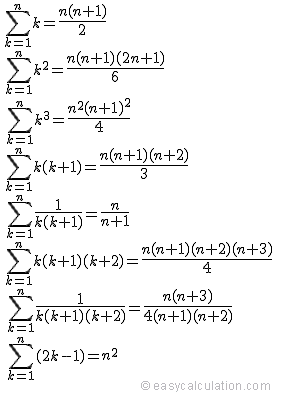

#### Question 5

Solve the power computation by a recursive algorithm, assume $n$ is an integer:

In [18]:
def power(m, n):
    if m == 0:
        return 0
    if n == 0:
        return 1
    elif n < 0:
        return 1/m*power(m, n + 1)
    else:
        return m*power(m, n - 1)
    
power(5, 2)

25

What is the time complexity in this algorithm? Explain your answer.

Time complexity: $O(n)$

There are $n$ recursive calls made and each costs constant time.